<div align="center"> 
    <h1> TP3 - TRANSFORMEE MULTIECHELLE 1D NON LINEAIRE</h1>
    <h3>Réalisé par : </h3>
    <h3>YABA BILONGO Michel Davel</h3>
</div>

### Enoncé : 
Les signaux considérés ici sont du type : $ x = (x_1, x_2,..., x_n )$, n représente la dimension du signal
(on le suppose toujours une puissance de 2) et l’échantillon d’indice i est noté par $ x_i $, pour éviter les
problèmes de traitement aux bords du signal, nous considérerons que le signal est périodique (c’est
à dire : $ x_{n+1} = x_1, x_{n+2} = x_2 $ etc., ainsi que $ x_0 = x_n, x_{−1} = x_{n−1} $ etc.)
On considère les exemples suivants :
- ex1 : $ x_i = i $, 1 ≤ i ≤ n.
- ex2 : une ligne d’une image de notre choix.
- ex3 : $ x_i $ = sin(2πi), 1 ≤ i ≤ n/2 et $ x_i $ = 1/2 + sin(2πi), n/2 < i ≤ n.

In [7]:
import numpy as np
from skimage.color import rgb2gray
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

### 1. On remplace dans les codes de la transformée de Haar, les opérations de "downsampling" et "upsampling" par deux fonction Python

In [12]:
def downsampling(u):
    s=2.0
    n = len(u)
    v = np.copy(u)
    w = np.zeros(n)
    m = n
    m = m//2
    w[0:m] = (v[0:2*m-1:2] + v[1:2*m:2]) / s
    return w

In [13]:
def upsampling(u):
    s=2.0
    n = len(u)
    v = np.copy(u)
    w = np.zeros(n)
    m = n
    m = m//2
    w[m:2*m] = (v[0:2*m-1:2] - v[1:2*m:2]) / s 
    return w

In [16]:
x = [1., 2., 3., 4., 5., 6., 7., 8.]
down = downsampling(x)
down

array([1.5, 3.5, 5.5, 7.5, 0. , 0. , 0. , 0. ])

In [17]:
upS = upsampling(x)
upS

array([ 0. ,  0. ,  0. ,  0. , -0.5, -0.5, -0.5, -0.5])

### 2. J'écris les fonctions directe et inverse qui implémente la transformée quadradique

In [74]:
def quad1d_eno_prediction(m, w, k):
    
    vpred=0.0
    
    if k== 0 | k==1 | k == m-2 | k == m-1:
        #on calcule les valeurs des erreurs aux bords
        vpred = w[k]
    
    if k in range(2, m-4):
        #on calcule les valeurs prédites; on calcule les différences finies
        c = abs(w[k-1] - w[[k]]) + abs(w[k] - w[k+1])
        g = abs(w[k-2] - w[k-1]) + abs(w[k] - w[k-1])
        d = abs(w[k+2] - w[k+1]) + abs(w[k] - w[k+1])
        #On calcule le minimum
        m = np.min(c, g, d)
        if m == c:
            vpred = w[k] -(w[k-1] - w[k+1])/8
        if m == g:
            vpred = (5*w[k])/8 + w[k-1]/2 - w[k-2]/8
        if m == d:
            vpred = (11*w[k])/8 - w[k+1]/2 + w[k+2]/8
    
    return vpred

In [34]:
def quad1d_eno_direct(u):
    n = len(u)
    v = np.copy(u)
    w = np.zeros(n)
    m = n
    while 1<m:
        for k in range(0, m//2):
            # on calcule les valeurs moyennes
            w[k] = (v[2*k] + v[2*k + 1])/2
        
        for k in range(0, m//2):
            # on calcule les valeurs prédites
            vpred = quad1d_eno_prediction(m//2, w, k)
            # on calcule l'erreur
            w[k + (m//2)] = v[2*k] - vpred
            
        for k in range(0, m):
            v[k] = w[k]
            
        m = m//2
        
    return v

In [35]:
def quad1d_eno_inverse(u):
    n = len(u)
    v = np.copy(u)
    w = np.zeros(n)
    v_pred = np.zeros(n)
    m = 1
    while m<n :
        for k in range(0, m):
            # on calcule les valeurs prédites
            vpred = quad1d_eno_prediction(m, v, k)
            # on ajoute l'erreur càd le détail pour trouver les valeurs initiales
            w[2*k] = vpred + v[k+m]
            # on calcule la valeur w[2*k + 1] en utilisant la relation de consistance
            w[2*k + 1] = 2*v[k] - w[2*k]
            
        for k in range(0, 2*m):
            v[k] = w[k]
        
        m = 2*m
        
    return v

### 3. Je vérifie pour les exemples ci-dessus que x = inverse(directe(x)) pour les signaux ex1, ex2 et ex3

####  - Préparation des signaux à tester

In [51]:
n=8
# Pour ex1
x1 = [float(i) for i in range(1, n+1)]
#print("x1 = ", x1)

# Pour ex2
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

img = mpimg.imread('lena.png')     
gray = rgb2gray(img)   
x2 = gray[0]

#plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
#plt.show()
m=4
x2 = x2.tolist()    
x2 = x2[0:8]
#print("x2 = ", x2)

# pour ex3
# x = sin(2πi), 1 ≤ i ≤ n/2
x3 = [np.sin(2*np.pi*i) for i in range(1, n//2+1)]
# x = 1/2 + sin(2πi), n/2 < i ≤ n
x3_ = [1/2 + np.sin(2*np.pi*i) for i in range(n//2+1, n+1)]
x3.extend(x3_)
#print("x3 = ",x3)

In [50]:
# Pour ex1
print("x1 : ", x1)
y1 = quad1d_eno_direct(x1)
print("y1 = ", y1)
y1_inv = quad1d_eno_inverse(y1)
#y1_inv = [round(i) for i in y1_inv]
print("inverse de y1 : ", y1_inv)

x1 :  [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]
y1 =  [ 4.5  2.5  1.5 -1.   1.   3.   5.  -0.5]
inverse de y1 :  [1. 2. 3. 4. 5. 6. 7. 8.]


In [43]:
# Pour ex2
#x2=[round(i,8) for i in x2]
print("x2 : ",[round(i,8) for i in x2])
#print("x2 = ", x2)
y2 = quad1d_eno_direct(x2)
print("y2 = ", y2)
y2_inv = quad1d_eno_inverse(y2)
#y2_inv = [round(i, 8) for i in y2_inv]
print("inverse de y2 : ", y2_inv)

x2 :  [0.63615845, 0.63615845, 0.63621845, 0.6316812, 0.63622512, 0.61371924, 0.63991061, 0.62997767]
y2 =  [ 0.63250615  0.63505414  0.63615845 -0.00498598  0.63615845  0.63621845
  0.63622512  0.00496647]
inverse de y2 :  [0.63615845 0.63615845 0.63621845 0.6316812  0.63622512 0.61371924
 0.63991061 0.62997767]


x est bien égale à l'inverse de direct(x)

In [49]:
print("x3 : ",[round(i,2) for i in x3])
y3 = quad1d_eno_direct(x3)
print("y3 = ", y3)
y3_inv = quad1d_eno_inverse(y3)
y3_inv = [round(i, 2) for i in y3_inv]
print("inverse de y3 : ", y3_inv)

x3 :  [-0.0, -0.0, -0.0, -0.0, 0.5, 0.5, 0.5, 0.5]
y3 =  [ 2.50000000e-01 -6.12323400e-16 -3.67394040e-16  2.22044605e-16
 -2.44929360e-16 -7.34788079e-16  5.00000000e-01  1.11022302e-16]
inverse de y3 :  [-0.0, -0.0, -0.0, -0.0, 0.5, 0.5, 0.5, 0.5]


x est bien égale à l'inverse de direct(x)

### 4. Pour les exemples, je compte les valeurs y = direct(x) supérieures à T pour T = 128 et T = 12

In [53]:
# fonction seuillage
def seuillage(u, T):
    u = np.array(u)
    return np.where(u>T, u, 0)

# fonction qui calcule le nbre de valeurs dans u supérieur à un certain seuil
def compte(u, T):
    cpt=0
    u = np.array(u) # on convertit la liste en tableau numpy
    c = np.where(u > T, cpt+1, 0) # on incrémente de 1 toutes les valeurs de u supérieur à T
    c=c.tolist() # on reconvertit à nouveau le tableau en liste
    return c.count(1) # renvoie le nbre de fois où 1 se retrouve dans la liste

In [54]:
# Pour T = 12
nb_y_ex1 = compte(y1, 12)
print("Il y a ",nb_y_ex1, " valeur(s) supérieure(s) à 12 dans ex1")
nb_y_ex2 = compte(y2, 12)
print("Il y a ",nb_y_ex2, " valeur(s) supérieure(s) à 12 dans ex2")
nb_y_ex3 = compte(y3, 12)
print("Il y a ",nb_y_ex3, " valeur(s) supérieure(s) à 12 dans ex3")

Il y a  0  valeur(s) supérieure(s) à 12 dans ex1
Il y a  0  valeur(s) supérieure(s) à 12 dans ex2
Il y a  0  valeur(s) supérieure(s) à 12 dans ex3


In [55]:
# Pour T = 128
nb_y_ex1 = compte(y1, 128)
print("Il y a ",nb_y_ex1, " valeur(s) supérieure(s) à 128 dans ex1")
nb_y_ex2 = compte(y2, 128)
print("Il y a ",nb_y_ex2, " valeur(s) supérieure(s) à 128 dans ex2")
nb_y_ex3 = compte(y3, 128)
print("Il y a ",nb_y_ex3, " valeur(s) supérieure(s) à 128 dans ex3")

Il y a  0  valeur(s) supérieure(s) à 128 dans ex1
Il y a  0  valeur(s) supérieure(s) à 128 dans ex2
Il y a  0  valeur(s) supérieure(s) à 128 dans ex3


#### - Comparaison avec les résultats de la transformée de Haar

Les résultats sont identiques à ceux obtenus sur la transformée de Haar

### 5. Pour ces exemples je calcule $e_{2,T} = ||x − inverse(seuillage(directe(x), T ))||_2$ , pour T = 128 et T = 12.

In [57]:
# calcul de l'erreur par rapport à un seuil
# Pour le seuil 12
# Pour ex1
T=12
x1_T = x1 - quad1d_eno_inverse(seuillage(y1, T))
e_ex1_12 = np.linalg.norm((x1_T), ord=2) #calcul de la norme de x1_T
print("Erreur seuil ex1 : ",e_ex1_12)

x2_T = x2 - quad1d_eno_inverse(seuillage(y2, T))
e_ex2_12 = np.linalg.norm((x2_T), ord=2)
print("Erreur seuil ex2 : ",e_ex2_12)

x3_T = x3 - quad1d_eno_inverse(seuillage(y3, T))
e_ex3_12 = np.linalg.norm((x3_T), ord=2)
print("Erreur seuil ex3 : ",e_ex3_12)

Erreur seuil ex1 :  14.2828568570857
Erreur seuil ex2 :  1.7891286550540824
Erreur seuil ex3 :  0.9999999999999968


### - Comparaison avec les résultats obtenus en transformée de Haar

En transformée de Haar, l'erreur par rapport à T=12 et T=128  pour ex1, ex2 et ex3 correspond à :
- Erreur seuil ex1 :  14.2828568570857
- Erreur seuil ex2 :  1.7891286605275318
- Erreur seuil ex3 :  1.0
    
En transformée de quadratique eno, l'erreur par rapport à T=12 et T=128  pour ex1, ex2 et ex3 correspond à :
- Erreur seuil ex1 :  14.2828568570857
- Erreur seuil ex2 :  1.7891286550540824
- Erreur seuil ex3 :  0.9999999999999968
 


On peut en déduire que les résultats sont meilleurs pour la transformée quadratique eno sur les signaux ex2 et ex3. En revanche sur le signal ex1, on obtient les mêmes résultats avec les 2 transformées.

### 6. Etude numériquement de la qualité de la reconstruction par rapport aux seuils utilisés. Faire le graphe de l’érreur en fonction du seuil.

In [69]:
# fonction qui renvoie les erreurs en fonction des seuils
def getErreur(seuil, x, y):
    e = []
    for i in seuil:
        x_T = x - quad1d_eno_inverse(seuillage(y, i))
        e_T = np.linalg.norm((x_T), ord=2)
        #print(np.max(np.array(e_T)))
        e.append(e_T)
    return e

# fonction d'affichage du graphe
def affichage(seuil, erreur, couleur):
    plt.plot(seuil, erreur, color=couleur)
    plt.xlabel('seuil')
    plt.ylabel('erreur')
    plt.title('Graphe des erreurs en fonction du seuil')
    plt.legend

In [59]:
# Je choisis les seuils de -129 à 129
T = [t for t in range(-129, 129)]

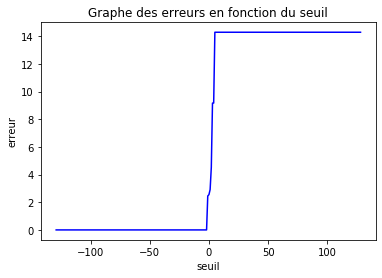

In [70]:
# Pour ex1
e = getErreur(T, x1, y1)
affichage(T, e, 'b')

Quand le seuil est inferieur à 0, il y a moins d'erreur; on dira mêmes presque pas d'erreur.
En revanche quand le signal est supérieur à 0, on enregistre un fort taux d'erreur atteignant les 14

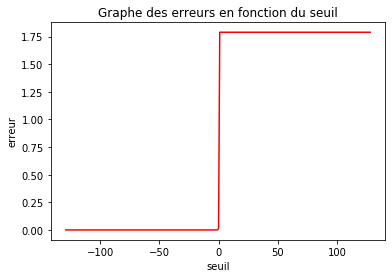

In [71]:
# Pour ex2
e = getErreur(T, x2, y2)
affichage(T, e, 'r')

Quand le seuil est inferieur à 0, il y a moins d'erreur; on dira mêmes presque pas d'erreur.
En revanche quand le signal est supérieur à 0, les proportions augmentent légèrement avoisinant les 2

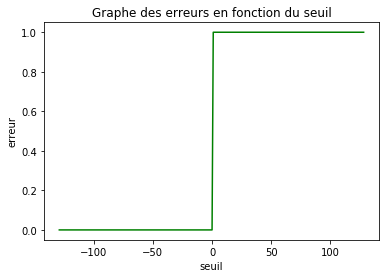

In [72]:
# Pour ex3
e = getErreur(T, x3, y3)
affichage(T, e, 'g')

Quand le seuil est inferieur à 0, il y a moins d'erreur; on dira mêmes presque pas d'erreur.
En revanche quand le signal est supérieur à 0, les erreurs augment mais ne dépasse pas 1.

#### - Conclusion

On peut en déduire que ex1 a plus d'erreurs que ex2 qui à son tour a plus d'erreur que ex3. D'une manière générale, la proportion d'erreur augmente pour des valeurs du seuil au delà de 0. A l'opposé, pour des valeurs du seuil inférieure à 0, la proportion d'erreurs reste relativement faible.

### Comparaison avec la transformée de Haar

En comparons les graphes d'erreurs en fonction du seuil dans les 2 transformées, on constate que :
- Dans la transformée de Haar 
    - Pour ex1, les erreurs varient entre 0 et 14.28
    - Pour ex2, les erreurs varient entre 0 et 1.79
    - Pour ex3, les erreurs varient entre 0 et 1
- Dans la transformée quadratique
    - Pour ex1, les erreurs varient entre 0 et environ 14.28
    - Pour ex2, les erreurs varient entre 0 et environ 1.79
    - Pour ex3, les erreurs varient entre 0 et 0.99
    
Les courbes ne nous donnent pas assez d'informations qui nous permettent de distinguer clairement les 2 transformées quand le seuil est inférieur à 0. Mais les différences se font voir quand on a un seuil plus grand. En effet, au delà d'un seuil de 0, la courbe d'erreur est légèrement plus grande en utilisant la transformée de Haar sur les signaux ex2 et ex3. On obtient par contre les mêmes résultats en utilisant les 2 transformées sur ex1. 

On peut en déduire qu'on peut utiliser les 2 transformées pour  les signaux à valeurs discrètes. Par contre, pour les signaux des images et des valeurs périodiques, il est préférable d'utiliser la transformée quadratique eno car on a légèrement moins d'erreur de prédiction quoique cette différence soit minime.